# XMR / USD exchange rate volatility analysis
(updated with 2020 - 2021 records)

### Import libraries

In [1]:
import isthmuslib as isli
from typing import Dict, List
import matplotlib.pyplot as plt
import os as os

### Import exchange rate data CSV from 2020+

In [2]:
# Import the USD / XMR exchange rate from CSV file 
timeseries: isli.Sequence = isli.Sequence.read_csv(_, os.path.join('data','XMR-USD-new.csv'),
                                                             basis_name='Date', sequence_name='Open')

# Filter for data 2020+
timeseries.slice(start_at='2020', inplace=True)

# Convert the basis from human-readable strings to machine time
timeseries.basis = [isli.machine_time(x) for x in timeseries.basis]

### Examine the exchange rate data

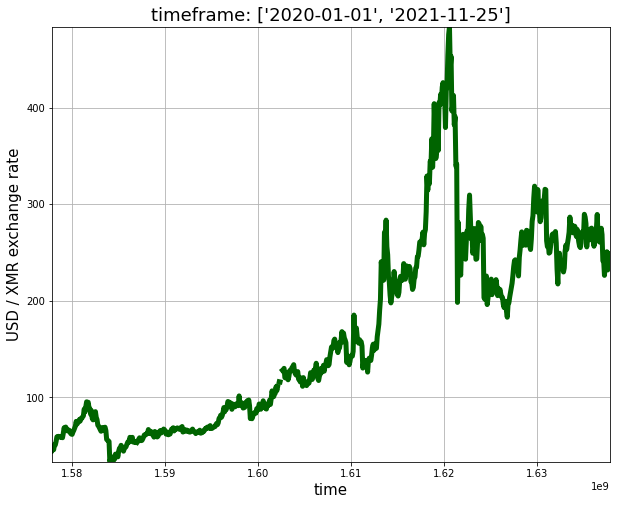

In [3]:
timeseries.plot();
plt.xlabel('time')
plt.ylabel('USD / XMR exchange rate');
plt.title(f"timeframe: {[isli.human_time(timeseries.basis[x], formatter='%Y-%m-%d', include_timezone=False) for x in [1, -1]]}", fontsize=18);

### Define a function for sliding window analysis

In [4]:
def appreciation_percent(o: isli.OrderedSeries) -> Dict[str, float]:
    """ Simple function that returns % difference between ending value and starting value """
    return {'% change in value': 100 * (o.sequence[-1] / o.sequence[0] - 1)}

### Apply function across series

In [5]:
window_widths_weeks: List[float] = [4, 8, 16, 32]
result: isli.SlidingWindowResults = timeseries.sliding_window(appreciation_percent, [x * 60 * 60 * 24 * 7 for x in window_widths_weeks], overlapping=True)

### View the sliding window analysis results

As a timeseries

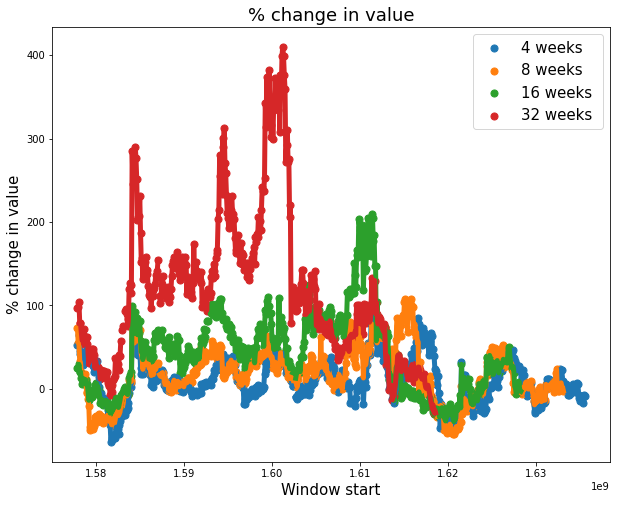

In [6]:
result.plot('% change in value', legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a PDF

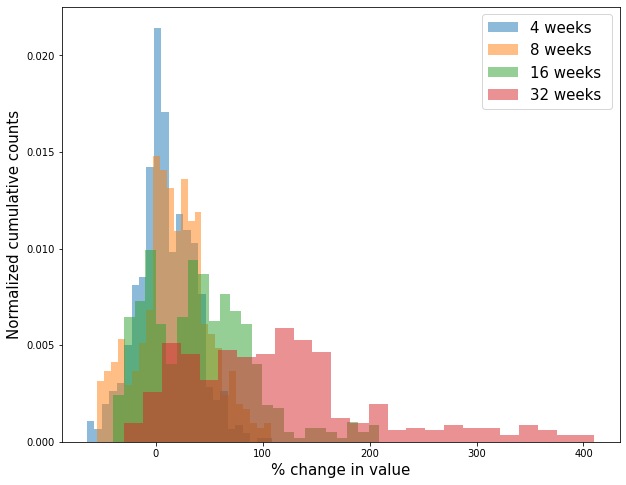

In [7]:
result.plot_pdf('% change in value', cumulative=False, density=True, bins=25, alpha=0.5, 
                legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a CDF

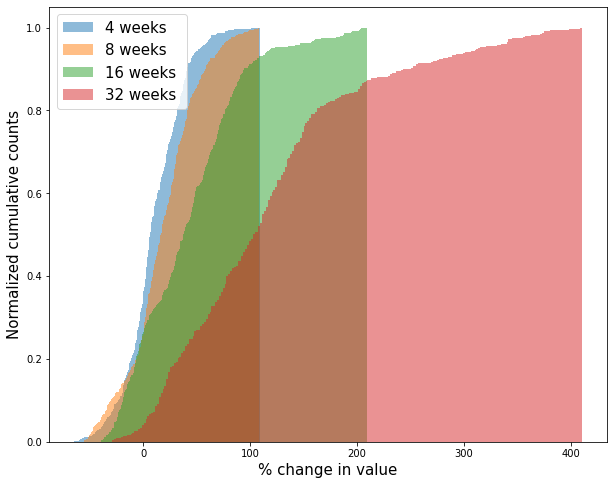

In [8]:
result.plot_pdf('% change in value', cumulative=True, density=True, bins=250, alpha=0.5, 
                legend_override=[f"{x} weeks " for x in window_widths_weeks]);